In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from utils import utils


In [40]:
main = pd.read_csv(r"./data/cosn.csv")

In [36]:
main['full_smiles'] = [str(solute) + "." + str(solvent) for (solute, solvent) in zip(main['solute_smiles'], main['solvent_smiles'])]

In [21]:
# main['measured_rejection'] = np.divide(main['measured_rejection'], 100)

In [45]:
main.head()

,DOI,Year,Journal,Membrane,MWCO,Solvent,measured_rejection2,solvent_smiles,Temperature,Process configuration,solute_smiles,full_smiles,dm300
0,10.1016/j.memsci.2018.12.077,2019,Journal of Membrane Science,DM300,300,IPA,0.36,CC(O)C,25,CF,CCCCCCCCCC,CCCCCCCCCC.CC(O)C,0.610690
1,10.1016/j.memsci.2018.12.077,2019,Journal of Membrane Science,DM300,300,EtOH,0.39,CCO,25,CF,O=C(OC)C(C)(CC(C)(CC(C)C(OC)=O)C(OC)=O)CC(C)(C...,O=C(OC)C(C)(CC(C)(CC(C)C(OC)=O)C(OC)=O)CC(C)(C...,0.988400
2,10.1016/j.memsci.2018.12.077,2019,Journal of Membrane Science,DM300,300,IPA,0.42,CC(O)C,25,CF,CCCCCCCCCC,CCCCCCCCCC.CC(O)C,0.610690
3,10.1016/j.memsci.2018.12.077,2019,Journal of Membrane Science,DM300,300,EtOH,0.45,CCO,25,CF,O=C(OC)C(C)(CC(C)(CC(C)C(OC)=O)C(OC)=O)CC(C)(C...,O=C(OC)C(C)(CC(C)(CC(C)C(OC)=O)C(OC)=O)CC(C)(C...,0.988400
4,10.1016/j.memsci.2018.12.077,2019,Journal of Membrane Science,DM300,300,IPA,0.47,CC(O)C,25,CF,CCCCCCCCCCCC,CCCCCCCCCCCC.CC(O)C,0.639832


/Users/ignaczg/miniforge3_arm64/envs/chemprop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


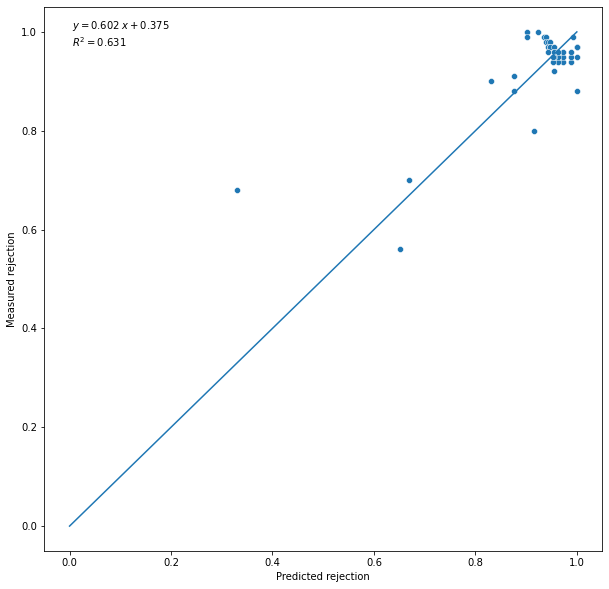

In [5]:
main = pd.read_csv('./data/predictions/cosn_predicted_final.csv')
main.rename(columns={'measured_rejection2':'measured_rejection'}, inplace=True)
main['dm300'].mask(main['dm300'] > 1., 1., inplace=True)
plt.figure(figsize=(10,10))
sns.scatterplot(main['dm300'], main['measured_rejection'], data=main)
plt.plot([0,1], [0,1], '')
# plt.ylim(0,100)
# plt.xlim(0,1)
plt.ylabel('Measured rejection')
plt.xlabel('Predicted rejection')


z = np.polyfit(main['dm300'], main['measured_rejection'], 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(main['dm300'])

r_square = r2_score(main['measured_rejection'], y_hat)
#plt.plot(main['dm300'],p(main['dm300']),"-")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(main['measured_rejection'],y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
        fontsize=10, verticalalignment='center', horizontalalignment='left')
plt.show()

In [43]:
import chemprop
arguments = [
    '--test_path',  './data/cosn_final.csv',
    '--preds_path', './data/predictions/cosn_final_predicted.csv',
    '--checkpoint_dir', './data/train_results/hyperopt/10_fold/',
    '--smiles_column', 'full_smiles'
    ]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)


154it [00:00, 145971.26it/s]
  0%|          | 0/10 [00:00<?, ?it/s]

Loading training args
Loading data
Validating SMILES
Test size = 154
Predicting with an ensemble of 10 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 10%|█         | 1/10 [00:22<03:18, 22.03s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 20%|██        | 2/10 [00:43<02:54, 21.82s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 30%|███       | 3/10 [01:05<02:32, 21.75s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 40%|████      | 4/10 [01:27<02:10, 21.75s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 50%|█████     | 5/10 [01:49<01:49, 21.88s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 60%|██████    | 6/10 [02:11<01:27, 21.88s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 70%|███████   | 7/10 [02:33<01:05, 21.90s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 80%|████████  | 8/10 [02:54<00:43, 21.87s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


 90%|█████████ | 9/10 [03:16<00:21, 21.89s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".


100%|██████████| 10/10 [03:38<00:00, 21.86s/it]

Saving predictions to ./data/predictions/cosn_final_predicted.csv
Elapsed time = 0:03:39


(0.3, 1.05)

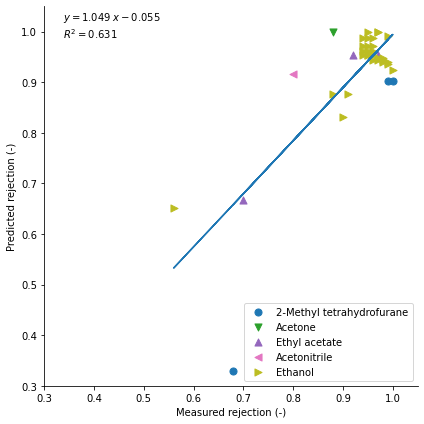

In [12]:
main = pd.read_csv('./data/predictions/cosn_predicted_final.csv')
main.rename(columns={'measured_rejection2':'measured_rejection'}, inplace=True)
main['dm300'].mask(main['dm300'] > 1., 1., inplace=True)

utils.rejection_diagram(y='dm300', 
                        x='measured_rejection', 
                        data=main, group='solvent_name', 
                        y_axis='Predicted rejection (-)', 
                        x_axis='Measured rejection (-)',
                        save='./figures/literature_generalization.svg')
plt.ylim(0.3,1.05)
plt.xlim(0.3,1.05)


In [3]:
main.head()

,DOI,Year,Journal,Membrane,MWCO,Solvent,solvent_name,measured_rejection,solvent_smiles,Temperature,Process configuration,solute_smiles,full_smiles,dm300,error
0,10.1039/c7ra11827a,2017,RSC Adv,DM300,300,MeTHF,2-Methyl tetrahydrofurane,0.68,CC1CCCO1,25,CF,O=CC1=CC=C(C(F)(F)F)C=C1,O=CC1=CC=C(C(F)(F)F)C=C1.CC1CCCO1,0.330219,0.122346
1,10.1002/cssc.201100355,2012,ChemSusChem,DM300,300,AcMe,Acetone,0.88,CC(C)=O,25,CF,CC(O[Pd]([P](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC...,CC(O[Pd]([P](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC...,1.000000,0.021094
2,10.1016/j.memsci.2017.05.003,2017,Journal of Membrane Science,DM300,300,MeCN,Acetonitrile,0.80,CC#N,25,DE,[Cl-].n1c4c([n+](c2c1cc(c(N)c2)C)c3ccccc3)cc(c...,[Cl-].n1c4c([n+](c2c1cc(c(N)c2)C)c3ccccc3)cc(c...,0.915939,0.013442
3,10.1039/c7ra11827a,2017,RSC Adv,DM300,300,MeTHF,2-Methyl tetrahydrofurane,1.00,CC1CCCO1,25,CF,FC(C(C=C1)=CC=C1C2N=C(C3=CC=C(C(F)(F)F)C=C3)NC...,FC(C(C=C1)=CC=C1C2N=C(C3=CC=C(C(F)(F)F)C=C3)NC...,0.902698,0.009468
4,10.1021/acssuschemeng.5b00734,2015,ASCECG,DM300,300,EtOH,Ethanol,0.56,CCO,23,CF,CCC(CO1)OC1=O,CCC(CO1)OC1=O.CCO,0.652129,0.008488
